In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("U.S._Chronic_Disease_Indicators.csv")

/Users/sulbha/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,10,18,19,20,21,23,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2015,2015,AK,Alaska,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,2,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2015,2015,AL,Alabama,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,1,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2015,2015,AR,Arkansas,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,5,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2015,2015,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,4,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2015,2015,CA,California,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,6,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403984 entries, 0 to 403983
Data columns (total 34 columns):
YearStart                    403984 non-null int64
YearEnd                      403984 non-null int64
LocationAbbr                 403984 non-null object
LocationDesc                 403984 non-null object
DataSource                   403984 non-null object
Topic                        403984 non-null object
Question                     403984 non-null object
Response                     79323 non-null object
DataValueUnit                374119 non-null object
DataValueType                403984 non-null object
DataValue                    297817 non-null object
DataValueAlt                 273666 non-null float64
DataValueFootnoteSymbol      188019 non-null object
DatavalueFootnote            187853 non-null object
LowConfidenceLimit           246819 non-null float64
HighConfidenceLimit          246819 non-null float64
StratificationCategory1      403984 non-null object
Strat

## EDA

In [5]:
df['Response'].value_counts()
# as all values are null or blanks do drop this and other null or blanks columns.

     79323
Name: Response, dtype: int64

In [6]:
lst_null_cates = ['StratificationCategoryID2','StratificationID2','StratificationCategoryID3','StratificationID3','StratificationCategory3','Stratification3','StratificationCategory2', 'Stratification2','ResponseID','Response']
df.drop(lst_null_cates, axis = 1, inplace = True)
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2015,2015,AK,Alaska,YRBSS,Alcohol,Alcohol use among youth,%,Crude Prevalence,22,...,24.5,Overall,Overall,"(64.84507995700051, -147.72205903599973)",2,ALC,ALC1_1,CrdPrev,OVERALL,OVR
1,2015,2015,AL,Alabama,YRBSS,Alcohol,Alcohol use among youth,%,Crude Prevalence,30.7,...,34.3,Overall,Overall,"(32.84057112200048, -86.63186076199969)",1,ALC,ALC1_1,CrdPrev,OVERALL,OVR
2,2015,2015,AR,Arkansas,YRBSS,Alcohol,Alcohol use among youth,%,Crude Prevalence,27.6,...,30.8,Overall,Overall,"(34.74865012400045, -92.27449074299966)",5,ALC,ALC1_1,CrdPrev,OVERALL,OVR
3,2015,2015,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,%,Crude Prevalence,34.8,...,40.2,Overall,Overall,"(34.865970280000454, -111.76381127699972)",4,ALC,ALC1_1,CrdPrev,OVERALL,OVR
4,2015,2015,CA,California,YRBSS,Alcohol,Alcohol use among youth,%,Crude Prevalence,28.9,...,34.7,Overall,Overall,"(37.63864012300047, -120.99999953799971)",6,ALC,ALC1_1,CrdPrev,OVERALL,OVR


Text(0.5,1,'Start Year Count')

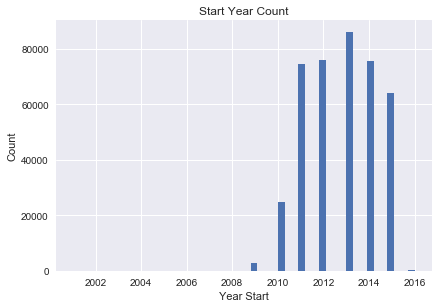

In [7]:
# pandas histogram

df['YearStart'].hist(bins = 50)
plt.tight_layout()
plt.xlabel('Year Start')
plt.ylabel('Count')
plt.title('Start Year Count')

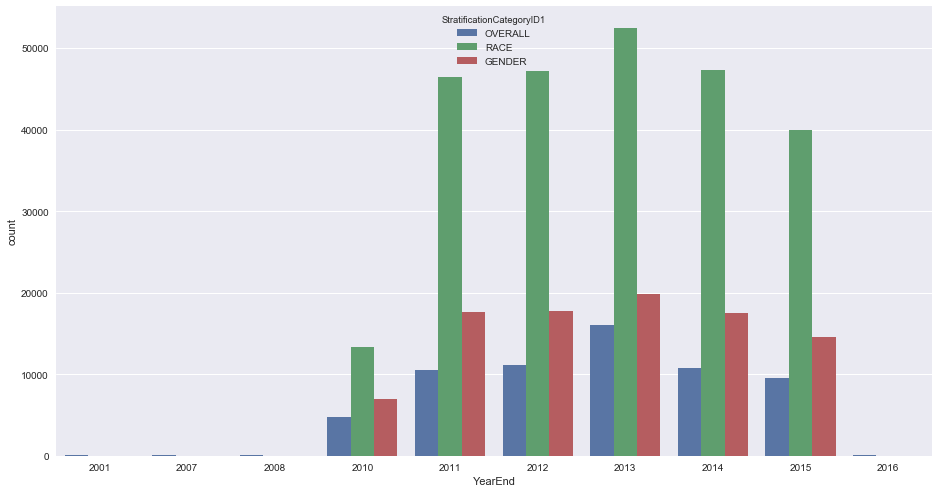

In [33]:
# sesborn countplot
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.countplot(x='YearEnd', data=df , hue = 'StratificationCategoryID1')

In [9]:
# Data is collected over Race, gender and overall. Out of which maximum results were obtained for 'Race'

In [195]:
df[df['YearStart'].isnull()].shape

(0, 24)

In [11]:
# plt.figure(figsize =(20,6))
# df['Topic'].hist(bins =50)
# plt.xticks(rotation = 20)
# plt.tight_layout()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

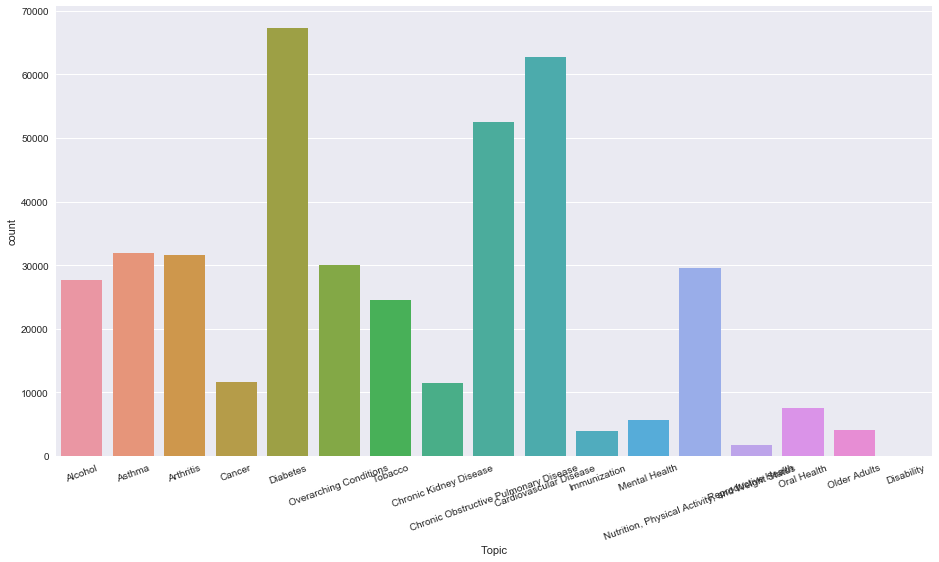

In [12]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.countplot(x='Topic', data = df)
plt.xticks(rotation = 20)

In [13]:
df['Topic'].value_counts()

Diabetes                                           67342
Cardiovascular Disease                             62678
Chronic Obstructive Pulmonary Disease              52536
Asthma                                             31958
Arthritis                                          31652
Overarching Conditions                             30092
Nutrition, Physical Activity, and Weight Status    29512
Alcohol                                            27697
Tobacco                                            24568
Cancer                                             11605
Chronic Kidney Disease                             11525
Oral Health                                         7593
Mental Health                                       5595
Older Adults                                        4003
Immunization                                        3838
Reproductive Health                                 1735
Disability                                            55
Name: Topic, dtype: int64

In [14]:
## Diabetes and Cardiovascular Disease are the highest reasons for mortality

In [15]:
## lets explore diabetes data

df_diabetes = df[df['Topic']=='Diabetes']
df_diabetes.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
8414,2015,2015,GA,Georgia,BRFSS,Diabetes,Diabetes prevalence among women aged 18-44 years,%,Crude Prevalence,4.2,...,6.4,Overall,Overall,"(32.83968109300048, -83.62758034599966)",13,DIA,DIA2_2,CrdPrev,OVERALL,OVR
16621,2015,2015,MO,Missouri,BRFSS,Diabetes,Diabetes prevalence among women aged 18-44 years,%,Crude Prevalence,7.2,...,9.5,Overall,Overall,"(38.635790776000476, -92.56630005299968)",29,DIA,DIA2_2,CrdPrev,OVERALL,OVR
17009,2015,2015,NY,New York,BRFSS,Diabetes,Diabetes prevalence among women aged 18-44 years,%,Crude Prevalence,4.7,...,6.0,Overall,Overall,"(42.82700103200045, -75.54397042699964)",36,DIA,DIA2_2,CrdPrev,OVERALL,OVR
17240,2015,2015,TX,Texas,BRFSS,Diabetes,Diabetes prevalence among women aged 18-44 years,%,Crude Prevalence,5.5,...,7.1,Overall,Overall,"(31.827240407000488, -99.42677020599967)",48,DIA,DIA2_2,CrdPrev,OVERALL,OVR
31027,2015,2015,IL,Illinois,BRFSS,Diabetes,Prevalence of high cholesterol among adults ag...,%,Crude Prevalence,69,...,74.8,Gender,Female,"(40.48501028300046, -88.99771017799969)",17,DIA,DIA11_1,CrdPrev,GENDER,GENF


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
8414,2015,2015,GA,Georgia,BRFSS,Diabetes,Diabetes prevalence among women aged 18-44 years,%,Crude Prevalence,4.2,...,6.4,Overall,Overall,"(32.83968109300048, -83.62758034599966)",13,DIA,DIA2_2,CrdPrev,OVERALL,OVR
16621,2015,2015,MO,Missouri,BRFSS,Diabetes,Diabetes prevalence among women aged 18-44 years,%,Crude Prevalence,7.2,...,9.5,Overall,Overall,"(38.635790776000476, -92.56630005299968)",29,DIA,DIA2_2,CrdPrev,OVERALL,OVR
17009,2015,2015,NY,New York,BRFSS,Diabetes,Diabetes prevalence among women aged 18-44 years,%,Crude Prevalence,4.7,...,6.0,Overall,Overall,"(42.82700103200045, -75.54397042699964)",36,DIA,DIA2_2,CrdPrev,OVERALL,OVR
17240,2015,2015,TX,Texas,BRFSS,Diabetes,Diabetes prevalence among women aged 18-44 years,%,Crude Prevalence,5.5,...,7.1,Overall,Overall,"(31.827240407000488, -99.42677020599967)",48,DIA,DIA2_2,CrdPrev,OVERALL,OVR
31027,2015,2015,IL,Illinois,BRFSS,Diabetes,Prevalence of high cholesterol among adults ag...,%,Crude Prevalence,69,...,74.8,Gender,Female,"(40.48501028300046, -88.99771017799969)",17,DIA,DIA11_1,CrdPrev,GENDER,GENF


Text(0.5,1,'Count vs Question Id')

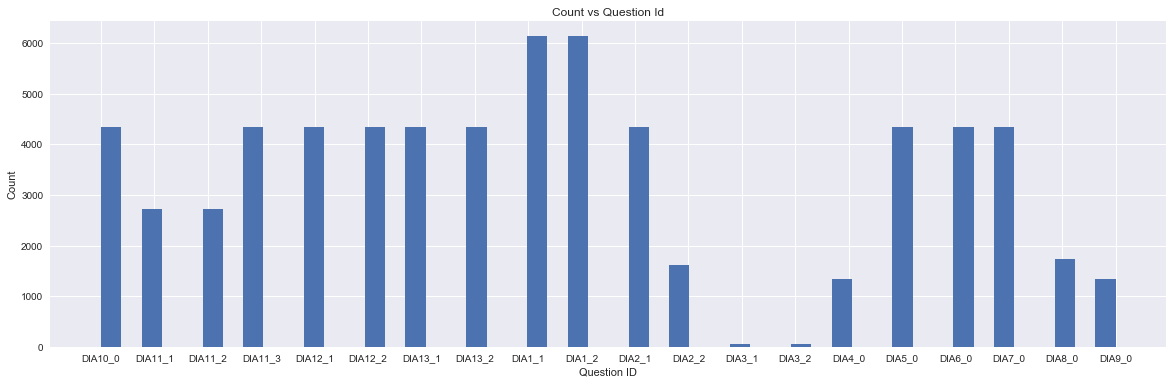

In [17]:
plt.figure(figsize=(20,6))
df_diabetes['QuestionID'].hist(bins =50)
plt.xlabel('Question ID')
plt.ylabel('Count')
plt.title('Count vs Question Id')

In [18]:
df_diabetes[df_diabetes['QuestionID']=='DIA1_1']['Question'].value_counts()

Mortality due to diabetes reported as any listed cause of death    6135
Name: Question, dtype: int64

In [200]:
## lets pick question id = DIA1_1 as thats the most popular question
df_diabetes_ID1 = df_diabetes[df_diabetes['QuestionID']=='DIA1_1']
df_diabetes_ID1.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
244336,2014,2014,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,59.8,...,81.7,Race/Ethnicity,American Indian or Alaska Native,"(64.84507995700051, -147.72205903599973)",2,DIA,DIA1_1,AgeAdjRate,RACE,AIAN
244337,2014,2014,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,85.1,...,125.6,Race/Ethnicity,Asian or Pacific Islander,"(64.84507995700051, -147.72205903599973)",2,DIA,DIA1_1,AgeAdjRate,RACE,API
244338,2014,2014,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,,...,NaN,Race/Ethnicity,"Black, non-Hispanic","(64.84507995700051, -147.72205903599973)",2,DIA,DIA1_1,AgeAdjRate,RACE,BLK
244339,2014,2014,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,48.6,...,57.4,Gender,Female,"(64.84507995700051, -147.72205903599973)",2,DIA,DIA1_1,AgeAdjRate,GENDER,GENF
244340,2014,2014,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,,...,NaN,Race/Ethnicity,Hispanic,"(64.84507995700051, -147.72205903599973)",2,DIA,DIA1_1,AgeAdjRate,RACE,HIS


In [201]:
df_diabetes_ID1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6135 entries, 244336 to 400308
Data columns (total 24 columns):
YearStart                    6135 non-null int64
YearEnd                      6135 non-null int64
LocationAbbr                 6135 non-null object
LocationDesc                 6135 non-null object
DataSource                   6135 non-null object
Topic                        6135 non-null object
Question                     6135 non-null object
DataValueUnit                4090 non-null object
DataValueType                6135 non-null object
DataValue                    6135 non-null object
DataValueAlt                 4998 non-null float64
DataValueFootnoteSymbol      6135 non-null object
DatavalueFootnote            6120 non-null object
LowConfidenceLimit           3332 non-null float64
HighConfidenceLimit          3332 non-null float64
StratificationCategory1      6135 non-null object
Stratification1              6135 non-null object
GeoLocation                  6120 n

In [202]:
df_diabetes_ID1[df_diabetes_ID1['DataValue'].isnull()].shape

(0, 24)

In [203]:
## no null values

In [204]:
## lets try to high confidence limit and data value. As high confidence limit is string with float values so converting
## it to numeric

In [210]:
df_diabetes_ID1['HighConfidenceLimit'] =np.round(df_diabetes_ID1['HighConfidenceLimit'])

/Users/sulbha/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [211]:
df_diabetes_ID1['HighConfidenceLimit'] =pd.to_numeric(df_diabetes_ID1['HighConfidenceLimit'], downcast='signed')

/Users/sulbha/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [212]:
df_diabetes_ID1['HighConfidenceLimit'].head()

244336     82.0
244337    126.0
244338      NaN
244339     57.0
244340      NaN
Name: HighConfidenceLimit, dtype: float64

In [213]:
df_diabetes_ID1[df_diabetes_ID1['HighConfidenceLimit'].isnull()].shape

(2803, 24)

In [214]:
mean_conf = np.mean(df_diabetes_ID1['HighConfidenceLimit'])
mean_conf

84.51110444177671

In [215]:
## fill 
df_diabetes_ID1['HighConfidenceLimit'].fillna(value = mean_conf,  inplace= True)
df_diabetes_ID1[df_diabetes_ID1['HighConfidenceLimit'].isnull()].shape

/Users/sulbha/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


(0, 24)

In [216]:
df_diabetes_ID1['DataValue'].dtype.name

'object'

In [217]:
df_diabetes_ID1[df_diabetes_ID1['DataValue'].isnull()].shape

(0, 24)

In [218]:
df_diabetes_ID1['DataValue'].head()

244336    59.8
244337    85.1
244338        
244339    48.6
244340        
Name: DataValue, dtype: object

In [219]:
df_diabetes_ID1[df_diabetes_ID1['DataValue']==' '].shape

(1137, 24)

In [220]:
## replace " " with 0
def impute_value(cols):
    val = cols[0]
    
    if val==" ":
        return '0'
    else:
        return val

In [221]:
df_diabetes_ID1['DataValue'] = df_diabetes_ID1[['DataValue']].apply(impute_value, axis = 1) 
df_diabetes_ID1[df_diabetes_ID1['DataValue']==' '].shape

/Users/sulbha/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(0, 24)

In [226]:

df_diabetes_ID1[df_diabetes_ID1['DataValue']=='0'].shape

(1137, 24)

In [227]:
df_diabetes_ID1['DataValue'].head()

244336    59.8
244337    85.1
244338       0
244339    48.6
244340       0
Name: DataValue, dtype: object

In [228]:
df_diabetes_ID1['DataValue'] = pd.to_numeric(df_diabetes_ID1['DataValue'], downcast='signed')
df_diabetes_ID1['DataValue'].head()


/Users/sulbha/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


244336    59.8
244337    85.1
244338     0.0
244339    48.6
244340     0.0
Name: DataValue, dtype: float64

In [229]:
df_diabetes_ID1['DataValue'] = np.round(df_diabetes_ID1['DataValue'])
df_diabetes_ID1['DataValue'].describe()

/Users/sulbha/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count      6135.000000
mean        772.214996
std        6467.160981
min           0.000000
25%          33.000000
50%          74.000000
75%         126.000000
max      223343.000000
Name: DataValue, dtype: float64

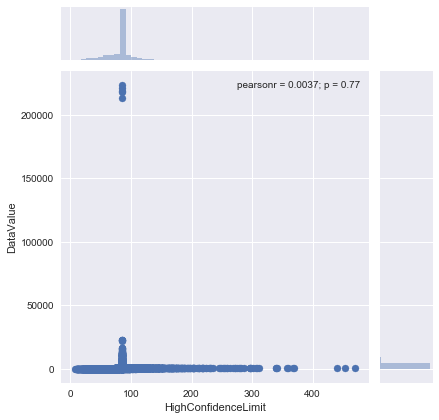

In [230]:
sns.jointplot(y='DataValue', x = 'HighConfidenceLimit', data = df_diabetes_ID1)

In [231]:
## linear relationship

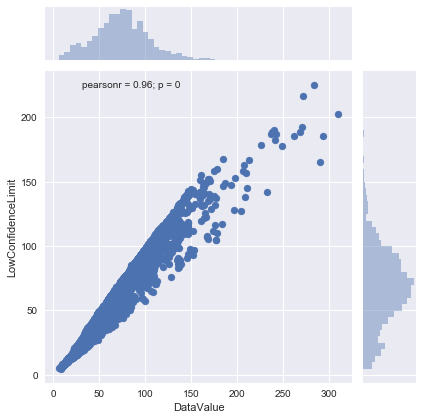

In [232]:
sns.jointplot(x='DataValue', y = 'LowConfidenceLimit', data = df_diabetes_ID1)

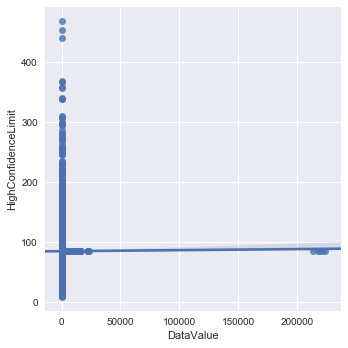

In [233]:
sns.lmplot(x='DataValue', y = 'HighConfidenceLimit', data = df_diabetes_ID1)

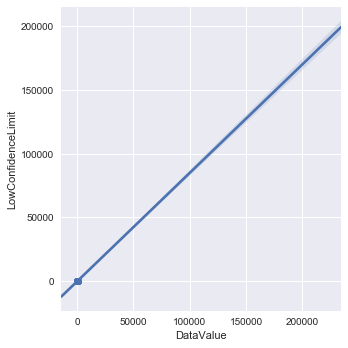

In [234]:
sns.lmplot(x='DataValue', y = 'LowConfidenceLimit', data = df_diabetes_ID1)

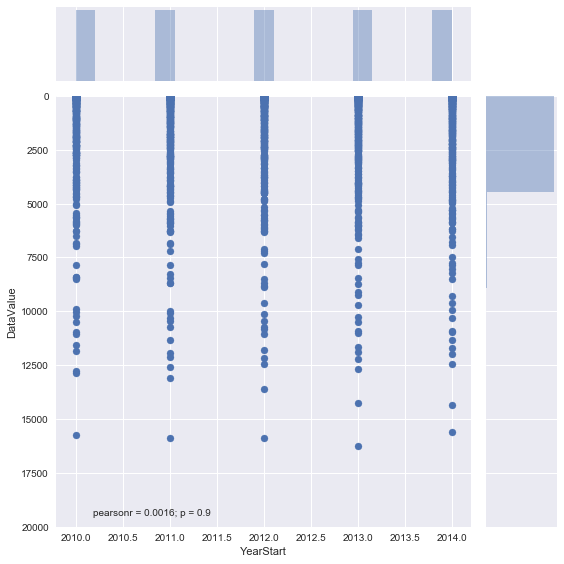

In [239]:
#sns.set(rc={'figure.figsize':(20.7,8.27)})
#sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.jointplot(y='DataValue', x = 'YearStart', data = df_diabetes_ID1, size =8, ylim=20000)


In [153]:
## Data values are increasing by each year

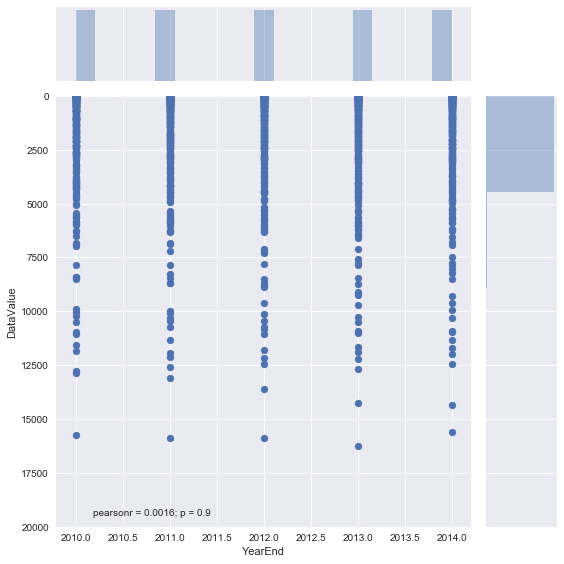

In [240]:
sns.jointplot(y='DataValue', x = 'YearEnd', data = df_diabetes_ID1, size =8, ylim=20000)

In [155]:
df_diabetes_ID1.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
244336,2014,2014,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,60.0,...,82.000000,Race/Ethnicity,American Indian or Alaska Native,"(64.84507995700051, -147.72205903599973)",2,DIA,DIA1_1,AgeAdjRate,RACE,AIAN
244337,2014,2014,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,85.0,...,126.000000,Race/Ethnicity,Asian or Pacific Islander,"(64.84507995700051, -147.72205903599973)",2,DIA,DIA1_1,AgeAdjRate,RACE,API
244338,2014,2014,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,0.0,...,84.734474,Race/Ethnicity,"Black, non-Hispanic","(64.84507995700051, -147.72205903599973)",2,DIA,DIA1_1,AgeAdjRate,RACE,BLK
244339,2014,2014,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,49.0,...,57.000000,Gender,Female,"(64.84507995700051, -147.72205903599973)",2,DIA,DIA1_1,AgeAdjRate,GENDER,GENF
244340,2014,2014,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,0.0,...,84.734474,Race/Ethnicity,Hispanic,"(64.84507995700051, -147.72205903599973)",2,DIA,DIA1_1,AgeAdjRate,RACE,HIS


In [241]:
## study pattern by stratification category

df_diabetes_ID1['StratificationCategoryID1'].value_counts()

RACE       3825
GENDER     1530
OVERALL     780
Name: StratificationCategoryID1, dtype: int64

In [242]:
df_diabetes_ID1['StratificationID1'].value_counts()

OVR     780
API     765
BLK     765
AIAN    765
GENF    765
GENM    765
HIS     765
WHT     765
Name: StratificationID1, dtype: int64

In [243]:
# Question - mortality due to diabetes as compared to any other reason for death

In [244]:
# lets check Race distribution

In [245]:
df_race = df_diabetes_ID1[df_diabetes_ID1['StratificationCategoryID1']=='RACE']

In [246]:
df_race.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
244336,2014,2014,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,60.0,...,82.000000,Race/Ethnicity,American Indian or Alaska Native,"(64.84507995700051, -147.72205903599973)",2,DIA,DIA1_1,AgeAdjRate,RACE,AIAN
244337,2014,2014,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,85.0,...,126.000000,Race/Ethnicity,Asian or Pacific Islander,"(64.84507995700051, -147.72205903599973)",2,DIA,DIA1_1,AgeAdjRate,RACE,API
244338,2014,2014,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,0.0,...,84.511104,Race/Ethnicity,"Black, non-Hispanic","(64.84507995700051, -147.72205903599973)",2,DIA,DIA1_1,AgeAdjRate,RACE,BLK
244340,2014,2014,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,0.0,...,84.511104,Race/Ethnicity,Hispanic,"(64.84507995700051, -147.72205903599973)",2,DIA,DIA1_1,AgeAdjRate,RACE,HIS
244344,2014,2014,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,54.0,...,62.000000,Race/Ethnicity,"White, non-Hispanic","(64.84507995700051, -147.72205903599973)",2,DIA,DIA1_1,AgeAdjRate,RACE,WHT


Text(0.5,1,'Mortality Count vs Race per Year')

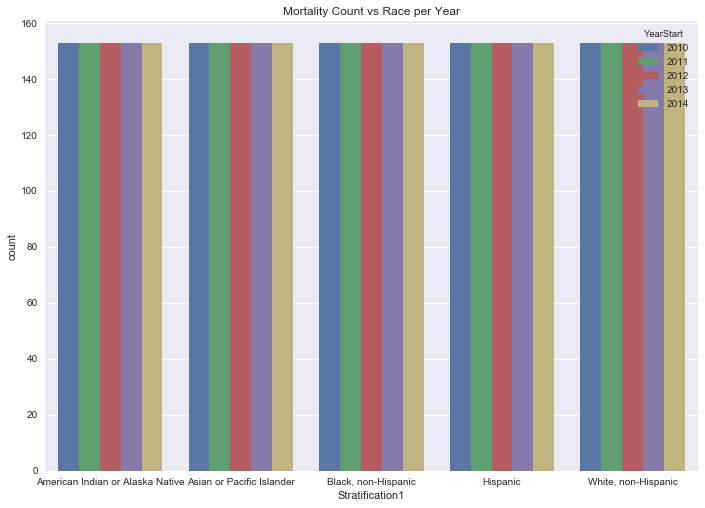

In [247]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.countplot(x='Stratification1', data = df_race, hue = 'YearStart')
plt.title('Mortality Count vs Race per Year')


In [248]:
df_race['YearStart'].value_counts()

2013    765
2011    765
2014    765
2012    765
2010    765
Name: YearStart, dtype: int64

In [163]:
## rate is increasing among American Indian or Alaska Native while it has remain whites over the years. 
## Also White, non-hispanic have the highest rates for mortality rates due to diabetes as compared to other races.

In [249]:
## lets do the same for gender
df_gender = df_diabetes_ID1[df_diabetes_ID1['StratificationCategoryID1']=='GENDER']
df_gender.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
244339,2014,2014,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,49.0,...,57.0,Gender,Female,"(64.84507995700051, -147.72205903599973)",2,DIA,DIA1_1,AgeAdjRate,GENDER,GENF
244342,2014,2014,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,70.0,...,82.0,Gender,Male,"(64.84507995700051, -147.72205903599973)",2,DIA,DIA1_1,AgeAdjRate,GENDER,GENM
244348,2014,2014,AL,Alabama,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,50.0,...,52.0,Gender,Female,"(32.84057112200048, -86.63186076199969)",1,DIA,DIA1_1,AgeAdjRate,GENDER,GENF
244350,2014,2014,AL,Alabama,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,72.0,...,76.0,Gender,Male,"(32.84057112200048, -86.63186076199969)",1,DIA,DIA1_1,AgeAdjRate,GENDER,GENM
244356,2014,2014,AR,Arkansas,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,58.0,...,61.0,Gender,Female,"(34.74865012400045, -92.27449074299966)",5,DIA,DIA1_1,AgeAdjRate,GENDER,GENF


Text(0.5,1,'Mortality Count vs Gender per Year')

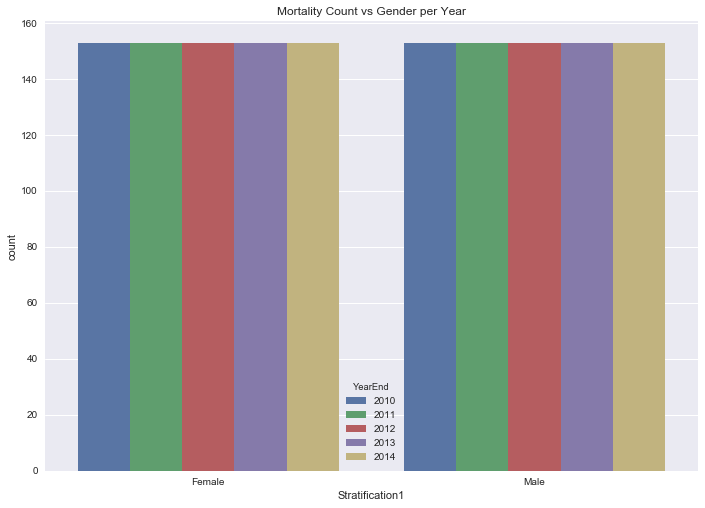

In [250]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.countplot(x='Stratification1', data = df_gender, hue = 'YearEnd')
plt.title('Mortality Count vs Gender per Year')


In [166]:
## The deaths due to diabetes have same pattern among men and women over the years.

In [167]:
df_race1 = df_race[['Stratification1', 'YearStart', 'DataValue']]
df_race1.head()

,Stratification1,YearStart,DataValue
244336,American Indian or Alaska Native,2014,60.0
244337,Asian or Pacific Islander,2014,85.0
244338,"Black, non-Hispanic",2014,0.0
244340,Hispanic,2014,0.0
244344,"White, non-Hispanic",2014,54.0


In [ ]:
df_race1[df_race1['Stratification1'].isnull()]